<div style="background-color: #424449; padding: 30px; text-align: center; font-size: 36px; font-weight: bold;">
  <span style="color: #caccd1;">3. Modelagem</span>
</div>

In [1]:
%%capture
%run 2.Pre_Processamento_ts.ipynb

## 3.1 - Auto ARIMA

Os valores encontrados anteriormente de forma manual (ARIMA(2,1,2)(2,1,2)[12]) vão servir como base para  definir os parâmetros iniciais do auto-arima. O pmdarima implementa um algoritmo de seleção automática dos hiperparâmetros do modelo ARIMA sem precisar ajustar manualmente os parâmetros do modelo.

d: representa o número de diferenças não sazonais. Ele é geralmente definido como 0 ou 1, dependendo se há ou não tendência nos dados.

start_p, max_p: representam o intervalo de valores a serem testados para o parâmetro p, que representa o número de termos autorregressivos.

start_q, max_q: representam o intervalo de valores a serem testados para o parâmetro q, que representa o número de termos de média móvel.

m: representa o período da sazonalidade. Se os dados não forem sazonais, esse valor deve ser definido como 0.

D: representa o número de diferenças sazonais. Se os dados forem sazonais, esse valor deve ser definido como 1.

start_P, max_P: representam o intervalo de valores a serem testados para o parâmetro P, que representa o número de termos autorregressivos sazonais.

start_Q, max_Q: representam o intervalo de valores a serem testados para o parâmetro Q, que representa o número de termos de média móvel sazonais.

In [2]:
%%time
# Auto ARIMA para encontrar os melhores parâmetros
model = auto_arima(train_ari, d=1, start_p=0, start_q=0, max_p=3, max_q=3,
                    seasonal=True, 
                           m=12, 
                           D=1, 
                           start_P=0, 
                           start_Q=0, 
                           max_P=3, 
                           max_Q=3, 
                           information_criterion='aic',
                           trace=True, 
                           error_action='ignore', 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3329.110, Time=0.44 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3204.386, Time=0.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3041.374, Time=0.83 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3252.862, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3039.823, Time=1.25 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3169.581, Time=0.52 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=3018.366, Time=2.28 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3082.042, Time=1.21 sec
 ARIMA(0,1,1)(3,1,1)[12]             : AIC=3014.856, Time=4.53 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=3033.974, Time=2.49 sec
 ARIMA(0,1,1)(3,1,2)[12]             : AIC=3002.478, Time=17.35 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3000.562, Time=7.66 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3034.564, Time=3.92 sec
 ARIMA(0,1,1)(2,1,3)[12]             : AIC=3002.442, Time=17.40 sec
 ARIMA(0,1,1)(1,1

Os parâmetros obtidos de forma manual (ARIMA(2,1,2)(2,1,2)[12]) apresentam algumas semelhanças aos parâmetros obtidos de modo automatizado.

Em resumo, esse modelo ARIMA(1,1,1)(2,1,2)[12] tem a seguinte estrutura:

Um termo autorregressivo (AR) de ordem 1 para capturar a dependência da série temporal em relação às suas próprias observações passadas, com uma ordem de diferenciação não sazonal de 1 para tornar a série temporal estacionária.

Um termo de média móvel (MA) de ordem 1 para capturar a dependência da série temporal em relação ao ruído aleatório presente na série, com uma ordem de diferenciação não sazonal de 1 para tornar a série temporal estacionária.

Um termo autorregressivo sazonal (SAR) de ordem 2 para capturar a dependência da série temporal em relação às suas próprias observações passadas em uma janela sazonal, com uma ordem de diferenciação sazonal de 1 para tornar a série temporal estacionária.

Um termo de média móvel sazonal (SMA) de ordem 2 para capturar a dependência da série temporal em relação ao ruído aleatório presente na série em uma janela sazonal, com uma ordem de diferenciação sazonal de 1 para tornar a série temporal estacionária.

Uma sazonalidade anual de 12 períodos, o que significa que a série temporal exibe um padrão sazonal anual que se repete a cada 12 períodos.

In [3]:
# Modelo SARIMAX 
sarimax = SARIMAX(train_ari, order=(1,1,1), seasonal_order=(2,1,2,12)) 
result = sarimax.fit() 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22937D+00    |proj g|=  1.17328D-01

At iterate    5    f=  2.16671D+00    |proj g|=  3.20344D-02

At iterate   10    f=  2.14347D+00    |proj g|=  1.51490D-02

At iterate   15    f=  2.14070D+00    |proj g|=  1.40992D-02

At iterate   20    f=  2.13758D+00    |proj g|=  1.64454D-03

At iterate   25    f=  2.13757D+00    |proj g|=  9.50213D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     31      1     0     0   

In [4]:
# Sumário do Modelo
result.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                producao   No. Observations:                  684
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -1462.095
Date:                                 Thu, 30 Mar 2023   AIC                           2938.191
Time:                                         14:22:52   BIC                           2969.752
Sample:                                     01-01-1965   HQIC                          2950.415
                                          - 12-01-2021                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4914      0.036     13.791      0.000       0.422       0.561
ma.L1         -0.9251      0.019    -49.594      0.000      -0.962      -0.889
ar.S.L12       0.6636      0.088      7.527      0.000       0.491       0.836
ar.S.L24      -0.3114      0.040     -7.836      0.000      -0.389      -0.233
ma.S.L12      -1.3407      0.089    -15.022      0.000      -1.516      -1.166
ma.S.L24       0.5624      0.072      7.852      0.000       0.422       0.703
sigma2         4.4834      0.189     23.777      0.000       4.114       4.853
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                83.99
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               4.54   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Podemos verificar alguns elementos do summary para identificar a adequação dos resíduos do modelo, se há autocorrelação não explicada e heteroscedasticidade nos erros.

Não há valores específicos para Ljung-Box (L1) (Q), Prob(Q), Heteroskedasticity (H) e Prob(H) (two-sided) que indiquem necessariamente um bom modelo SARIMAX. Essas estatísticas são usadas para avaliar a adequação dos resíduos do modelo e verificar se há autocorrelação não explicada e heteroscedasticidade nos erros.

Ljung-Box (L1) (Q): mede a autocorrelação dos resíduos em diferentes lags. Um valor alto de Q indica que há autocorrelação significativa nos resíduos e que o modelo pode ser melhorado. Um valor baixo de Q indica que não há autocorrelação significativa nos resíduos.

Prob(Q): fornece o valor p associado ao teste de Ljung-Box. Um valor p abaixo de 0,05 indica que há autocorrelação significativa nos resíduos.

Heteroskedasticity (H): testa se a variância dos resíduos é constante ao longo do tempo. Um valor alto de H indica que há heteroscedasticidade nos resíduos e que o modelo pode ser melhorado. Um valor baixo de H indica que não há heteroscedasticidade significativa nos resíduos.

Prob(H) (two-sided): fornece o valor p associado ao teste de heteroscedasticidade. Um valor p abaixo de 0,05 indica que há heteroscedasticidade significativa nos resíduos.

Diante disso podemos concluir que não há autocorrelação significativa nos resíduos. No entanto, como Prob(H) (two-sided) é menor que 0,05 indica que há alguma heteroscedasticidade nos resíduos.

O teste de heterocedasticidade é apenas um dentre muitos testes que podem ser utilizados para avaliar a qualidade de um modelo. Diante disso, é possível ter um Prob(H) (two-sided) = 0.00 e ainda assim o modelo ser bom, desde que outros critérios de avaliação do modelo sejam satisfatórios, como, por exemplo, se os gráficos dos resíduos apresentarem uma distribuição próxima à normal e não houver evidência de autocorrelação nos resíduos, é possível que o modelo ainda seja bom, mesmo que o teste de heterocedasticidade indique um valor de Prob(H) (two-sided) = 0.00.

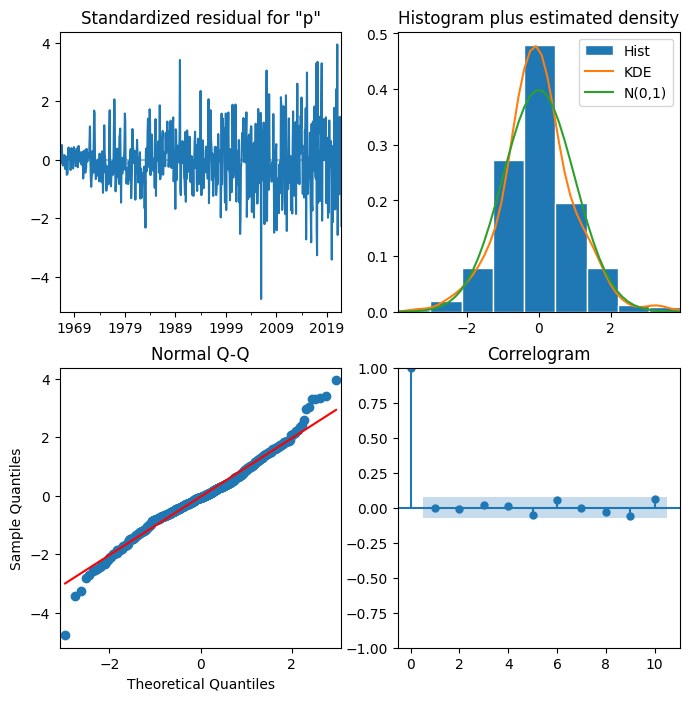

In [5]:
# Análise dos Resíduos
result.plot_diagnostics(figsize=(8,8))
plt.show()

Espera-se que os resíduos do modelo sejam aleatórios, normalmente distribuídos e sem autocorrelação significativa. Se os resíduos não seguirem essas propriedades, isso pode indicar que o modelo não é adequado e precisa ser melhorado.

Assim, através dos gráficos de resíduos acima podemos concluir que:

Gráfico de Linha dos Resíduos: possui valores aleatórios próximos a zero, sem padrões evidentes ou tendências. Isso indica que o modelo capturou bem os padrões na série temporal.

Histograma dos Resíduos: apresenta uma distribuição normal dos resíduos. Isso assinala que o modelo está captando bem a estrutura dos dados e que as variáveis importantes foram incluídas.

Gráfico QQ dos Resíduos: este gráfico compara a distribuição dos resíduos com uma distribuição normal teórica. Assim, como os pontos do gráfico seguem a linha reta, isso indica que os resíduos são normalmente distribuídos.

Gráfico ACF dos Resíduos: este gráfico mostra a autocorrelação dos resíduos e deve parecer como uma linha horizontal. Isso indica que não há autocorrelação significativa nos resíduos.


Com base em tudo que foi analisado, aparentemente temos um modelo satisfatório. Vamos apurar se as métricas corroboram com isso.

**Previsões (Dentro da Amostra)**

Fazer previsões "dentro da amostra" (in-sample) significa usar o modelo treinado para prever valores para o mesmo período de tempo em que os dados de treinamento estão disponíveis. Em outras palavras, as previsões são feitas para os dados que já foram vistos pelo modelo. Essa abordagem pode ser útil para avaliar o quão bem o modelo se ajusta aos dados de treinamento, mas não fornece informações úteis sobre a capacidade do modelo de prever dados futuros que ainda não foram observados.

In [6]:
# Previsões
pred = result.get_prediction(start=-12, dynamic= False , typ='levels')

In [7]:
# Valores previstos dentro da amostra
pred_mean = pred.predicted_mean
pred_mean

2021-01-01    119.124680
2021-02-01    105.931377
2021-03-01    103.922934
2021-04-01     87.761318
2021-05-01     89.423610
2021-06-01    101.090065
2021-07-01    114.692303
2021-08-01    110.979501
2021-09-01    101.447846
2021-10-01     92.704187
2021-11-01     95.202180
2021-12-01    113.146544
Freq: MS, Name: predicted_mean, dtype: float64

In [8]:
# Intervalo de confiança para as previsões
conf_int = pred.conf_int()
conf_int

,lower producao,upper producao
2021-01-01,114.974655,123.274705
2021-02-01,101.781352,110.081402
2021-03-01,99.772909,108.072959
2021-04-01,83.611293,91.911343
2021-05-01,85.273585,93.573635
2021-06-01,96.940040,105.240089
2021-07-01,110.542279,118.842328
2021-08-01,106.829476,115.129526
2021-09-01,97.297821,105.597871
2021-10-01,88.554162,96.854212


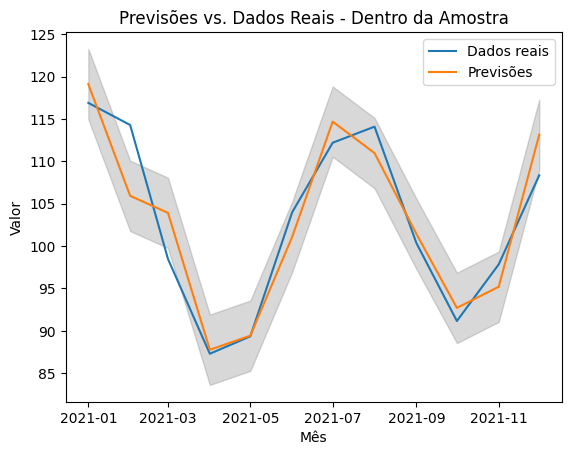

In [9]:
# Plotando o gráfico das previsões dentro da amostra com o intervalo de confiança
plt.plot(train_ari[-12:], label="Dados reais")
plt.plot(pred_mean, label="Previsões")
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3)
plt.legend(loc="best")
plt.xlabel("Mês")
plt.ylabel("Valor")
plt.title("Previsões vs. Dados Reais - Dentro da Amostra")
plt.show();

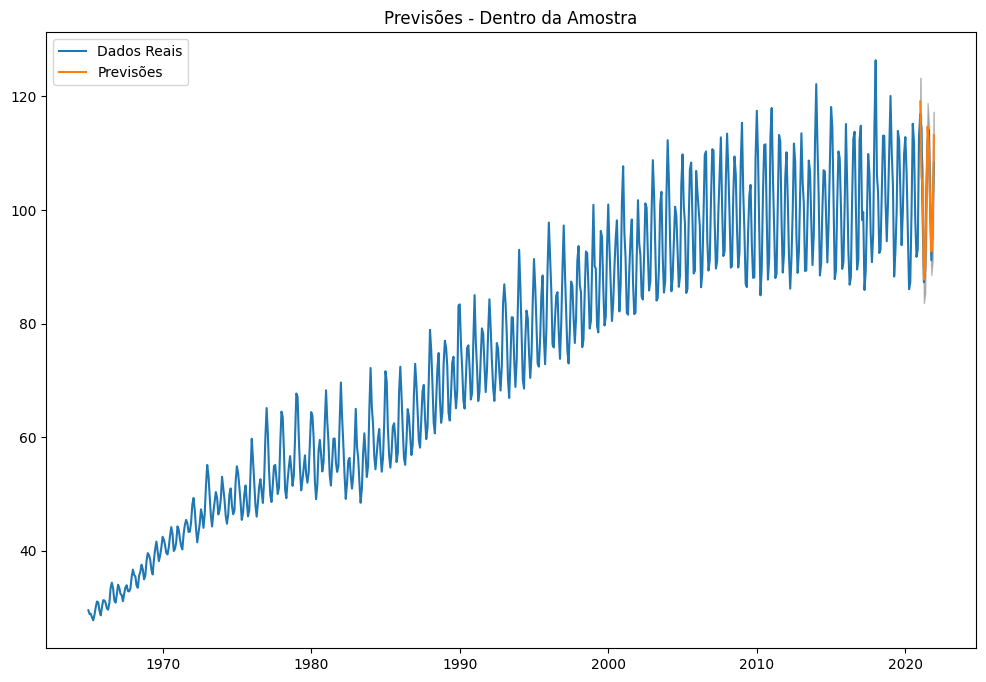

In [10]:
# Gráfico dos valores previstos dentro da amostra
plt.figure(figsize=(12, 8))
plt.plot(train_ari['producao'], label='Dados Reais')
plt.plot(pred_mean, label='Previsões')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.5)
plt.title("Previsões - Dentro da Amostra")
plt.legend()
plt.show();

In [11]:
# Últimos 12 valores dos dados de treino
y_12meses = train_ari[-12:]
y_12meses

,producao
data,
2021-01-01,116.9067
2021-02-01,114.2905
2021-03-01,98.4832
2021-04-01,87.2921
2021-05-01,89.3455
2021-06-01,103.9947
2021-07-01,112.2001
2021-08-01,114.0978
2021-09-01,100.3642


In [12]:
# Transformar o Dataframe em um array
y_12meses = y_12meses.values
y_12meses

array([[116.9067],
       [114.2905],
       [ 98.4832],
       [ 87.2921],
       [ 89.3455],
       [103.9947],
       [112.2001],
       [114.0978],
       [100.3642],
       [ 91.1548],
       [ 97.8449],
       [108.3546]])

In [13]:
# Transformar o Dataframe em array para se calcular as métricas
pred_mean_v = pred_mean.copy()
pred_mean_v = pred_mean_v.values
pred_mean_v

array([119.12468001, 105.93137723, 103.92293379,  87.76131813,
        89.42360991, 101.09006461, 114.69230344, 110.97950119,
       101.44784605,  92.70418674,  95.2021799 , 113.14654406])

In [14]:
# Função para a métrica SMAPE
def smape(y_test, y_pred):
    numerator = np.abs(y_test - y_pred)
    denominator = np.abs(y_test) + np.abs(y_pred)
    return 200 * (numerator / denominator).mean()

In [15]:
# Modelo Auto ARIMA final

# Métricas
metricas = []

modelo = 'Auto ARIMA'
MAE = metrics.mean_absolute_error(y_12meses, pred_mean_v)
MSE = metrics.mean_squared_error(y_12meses, pred_mean_v)
MAPE = mean_absolute_percentage_error(y_12meses, pred_mean_v)
RMSE = np.sqrt(metrics.mean_squared_error(y_12meses, pred_mean_v))
SMAPE = smape(y_12meses, pred_mean_v)

metricas.append((modelo, MAE, MSE, RMSE, MAPE*100, SMAPE))

df_ari = pd.DataFrame(metricas, columns=['Modelo', 'MAE', 'MSE', 'RMSE', 'MAPE', 'SMAPE'])

df_ari

,Modelo,MAE,MSE,RMSE,MAPE,SMAPE
0,Auto ARIMA,2.928917,13.542058,3.679954,2.750811,11.149888


**Previsões (Fora da Amostra)**

Fazer previsões "fora da amostra" (out-of-sample) significa usar o modelo treinado para prever valores para um período futuro de tempo que ainda não foi visto pelo modelo. Essa abordagem permite avaliar a capacidade do modelo de prever dados futuros e é útil para verificar se o modelo é capaz de generalizar bem para novos dados.

**Validação Walk_Forward**

A validação walk-forward é uma técnica de validação de modelos de séries temporais que envolve a divisão dos dados em um conjunto de treinamento e um conjunto de teste, onde o conjunto de teste contém observações que vêm após o conjunto de treinamento.

O modelo é treinado com o conjunto de treinamento e, em seguida, é usado para fazer previsões no conjunto de teste. Depois disso, o conjunto de treinamento é expandido para incluir o próximo período de observações e o processo é repetido para gerar novas previsões. Esse processo continua até que todo o conjunto de dados tenha sido usado para fazer previsões.

A vantagem da validação walk-forward é que ela permite que o modelo seja avaliado de forma mais realista, já que as previsões são feitas com dados futuros que não estavam disponíveis no treinamento do modelo. Isso pode ajudar a identificar problemas com o modelo que não seriam detectados com outras técnicas de validação.

In [16]:
# Dados de treino e teste para a Validação Walk_Forward
train_wf = train_ari.values
test_wf = test_ari.values

In [17]:
# Realiza a validação walk-forward
history = [x for x in train_wf]
predictions = list()

# Inicia Walk-Forward
for t in range(len(test_wf)):

    # Cria um modelo SARIMA com os dados de history
    model = SARIMAX(history, order=(1,1,1), seasonal_order=(2,1,2,12))

    # Treina o modelo SARIMA
    model_fit = model.fit(disp=0)

    # A variável valor_predito recebe o valor previsto pelo modelo
    valor_predito = model_fit.forecast()[0]

    # Adiciona o valor predito na lista de predicões
    predictions.append(valor_predito)

    # A variável valor_real recebe o valor real do teste
    valor_real = test_wf[t]

    # Adiciona o valor real a variável history
    history.append(valor_real)

    # Imprime valor predito e valor real
    print('Valor previsto=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

Valor previsto=117.896, Valor esperado=127
Valor previsto=112.901, Valor esperado=114
Valor previsto=104.363, Valor esperado=103
Valor previsto=90.344, Valor esperado= 91
Valor previsto=92.966, Valor esperado= 94
Valor previsto=104.742, Valor esperado=105
Valor previsto=114.595, Valor esperado=116
Valor previsto=114.892, Valor esperado=114
Valor previsto=102.717, Valor esperado=100
Valor previsto=93.020, Valor esperado= 91
Valor previsto=97.929, Valor esperado=103
Valor previsto=113.766, Valor esperado=122


In [18]:
# Teste para validação walk-forward
test_wf2 = test_ari.copy()
test_wf2 = test_wf2.values
test_wf2

array([[126.5273],
       [114.3064],
       [102.7847],
       [ 91.3963],
       [ 93.8455],
       [104.8027],
       [115.6311],
       [114.2666],
       [100.4343],
       [ 91.061 ],
       [102.732 ],
       [121.6866]])

In [19]:
# Previsões através da validação Walk_Forward
predictions

[117.89629271265825,
 112.9012675730381,
 104.3633693374285,
 90.34442282359042,
 92.9658524731522,
 104.74163904100959,
 114.59472086598319,
 114.89229919903055,
 102.71699356168929,
 93.02024960997113,
 97.92882810936341,
 113.76569788543142]

In [20]:
# Modelo SARIMA para previsões fora da amostra

# Métricas
metricas = []

modelo = 'Auto ARIMA'
MAE = metrics.mean_absolute_error(test_wf2, predictions)
MSE = metrics.mean_squared_error(test_wf2, predictions)
MAPE = mean_absolute_percentage_error(test_wf2, predictions)
RMSE = np.sqrt(metrics.mean_squared_error(test_wf2, predictions))
SMAPE = smape(test_wf2, predictions)

metricas.append((modelo, MAE, MSE, RMSE, MAPE*100, SMAPE))

df_wf = pd.DataFrame(metricas, columns=['Modelo', 'MAE', 'MSE', 'RMSE', 'MAPE', 'SMAPE'])

df_wf

,Modelo,MAE,MSE,RMSE,MAPE,SMAPE
0,Auto ARIMA,2.686291,14.764243,3.842427,2.39884,11.276195


**Modelo Final**

In [21]:
# Forecast Modelo Final
fct = result.get_forecast(steps=len(test_ari))
pred_arima = fct.predicted_mean
pred_arima

2022-01-01    117.896293
2022-02-01    108.262027
2022-03-01    100.545762
2022-04-01     88.592747
2022-05-01     90.860644
2022-06-01    102.495122
2022-07-01    112.743408
2022-08-01    112.620835
2022-09-01    101.031842
2022-10-01     92.653098
2022-11-01     98.180983
2022-12-01    110.731964
Freq: MS, Name: predicted_mean, dtype: float64

In [22]:
# Intervalo de confiança para as previsões fora da amostra
conf_int_fct = fct.conf_int()
conf_int_fct

,lower producao,upper producao
2022-01-01,113.746268,122.046318
2022-02-01,103.492716,113.031338
2022-03-01,95.556280,105.535244
2022-04-01,83.497819,93.687675
2022-05-01,85.700529,96.020760
2022-06-01,97.286026,107.704219
2022-07-01,107.492529,117.994287
2022-08-01,107.331609,117.910061
2022-09-01,95.706018,106.357667
2022-10-01,87.291632,98.014563


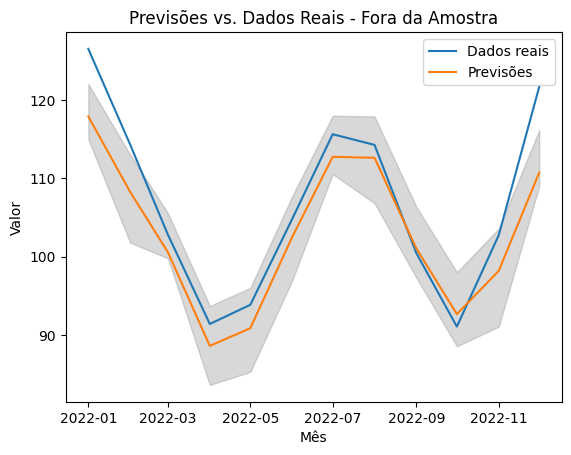

In [23]:
# Gráfico das previsões fora da amostra
plt.plot(test_ari, label="Dados reais")
plt.plot(pred_arima, label="Previsões")
plt.fill_between(conf_int_fct.index, conf_int.iloc[:, 0], conf_int_fct.iloc[:, 1], color='gray', alpha=0.3)
plt.legend(loc="best")
plt.xlabel("Mês")
plt.ylabel("Valor")
plt.title("Previsões vs. Dados Reais - Fora da Amostra")
plt.show();

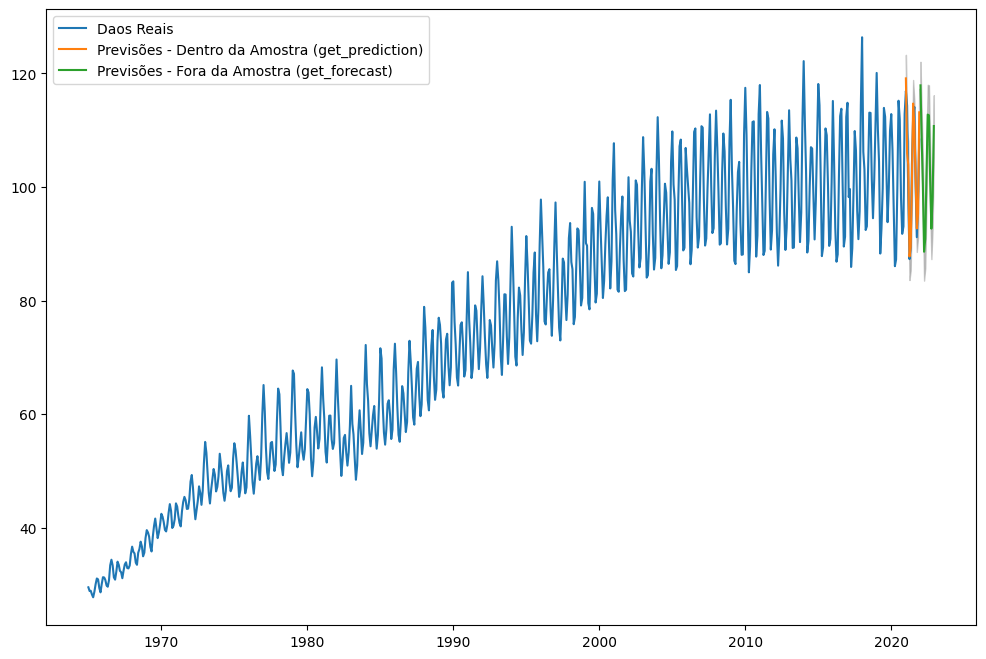

In [24]:
# Gráfico previsões fora da amostra
plt.figure(figsize=(12, 8))
plt.plot(train_ari['producao'], label='Daos Reais')
plt.plot(pred_mean, label='Previsões - Dentro da Amostra (get_prediction)')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.4)
plt.plot(pred_arima, label='Previsões - Fora da Amostra (get_forecast)')
plt.fill_between(conf_int_fct.index, conf_int_fct.iloc[:, 0], conf_int_fct.iloc[:, 1], color='gray', alpha=0.4)
plt.legend()
plt.show();

In [25]:
# Transformar o Dataframe em um array
test_ari2 = test_ari.copy()
test_ari2 = test_ari2.values
test_ari2

array([[126.5273],
       [114.3064],
       [102.7847],
       [ 91.3963],
       [ 93.8455],
       [104.8027],
       [115.6311],
       [114.2666],
       [100.4343],
       [ 91.061 ],
       [102.732 ],
       [121.6866]])

In [26]:
# Transformar o Dataframe em array para se calcular as métricas
pred_arima2 = pred_arima.copy()
pred_arima2 = pred_arima2.values
pred_arima2

array([117.89629271, 108.26202697, 100.54576199,  88.59274685,
        90.86064412, 102.49512227, 112.743408  , 112.62083517,
       101.03184246,  92.65309786,  98.18098271, 110.73196424])

In [27]:
# Modelo SARIMA final

# Métricas
metricas = []

modelo = 'Auto ARIMA'
MAE = metrics.mean_absolute_error(test_ari2, pred_arima2)
MSE = metrics.mean_squared_error(test_ari2, pred_arima2)
MAPE = mean_absolute_percentage_error(test_ari2, pred_arima2)
RMSE = np.sqrt(metrics.mean_squared_error(test_ari2, pred_arima2))
SMAPE = smape(test_ari2, pred_arima2)

metricas.append((modelo, MAE, MSE, RMSE, MAPE*100, SMAPE))

df_ari_f = pd.DataFrame(metricas, columns=['Modelo', 'MAE', 'MSE', 'RMSE', 'MAPE', 'SMAPE'])

df_ari_f

,Modelo,MAE,MSE,RMSE,MAPE,SMAPE
0,Auto ARIMA,3.936588,24.399226,4.939557,3.537567,11.532328
